<a href="https://colab.research.google.com/github/LuisAntonCosta/Modelo-de-previsao-de-queimadas/blob/main/modelo_queimadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


In [6]:
df1 = pd.read_csv("/content/drive/MyDrive/Data science/dataset/Dataset_FireWatch_Brazil_Q1_2024.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Data science/dataset/Dataset_FireWatch_Brazil_Q2_2024.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Data science/dataset/Dataset_FireWatch_Brazil_Q3_2024.csv")

In [7]:
df = pd.concat([df1,df2,df3])

In [8]:
df.head()

,data,municipio,estado,bioma,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
0,2024-01-01,VALE DO ANARI,RONDÔNIA,Amazônia,0.0,1698.00,0.0,13.00
1,2024-01-01,SÃO GABRIEL DA CACHOEIRA,AMAZONAS,Amazônia,0.2,206.80,0.0,81.40
2,2024-01-01,MANAQUIRI,AMAZONAS,Amazônia,0.0,60.00,0.0,27.00
3,2024-01-01,JUTAÍ,AMAZONAS,Amazônia,2.0,776.00,0.0,211.00
4,2024-01-01,AUTAZES,AMAZONAS,Amazônia,0.0,2.22,0.0,97.67


In [9]:
df.isnull().sum()

,0
data,0
municipio,0
estado,0
bioma,1
avg_numero_dias_sem_chuva,0
avg_precipitacao,0
avg_risco_fogo,0
avg_frp,89


In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 171249 entries, 0 to 78516
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   data                       171249 non-null  object 
 1   municipio                  171249 non-null  object 
 2   estado                     171249 non-null  object 
 3   bioma                      171248 non-null  object 
 4   avg_numero_dias_sem_chuva  171249 non-null  float64
 5   avg_precipitacao           171249 non-null  float64
 6   avg_risco_fogo             171249 non-null  float64
 7   avg_frp                    171160 non-null  float64
dtypes: float64(4), object(4)
memory usage: 11.8+ MB


,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
count,171249.000000,171249.000000,171249.000000,171160.000000
mean,23.176133,100.829799,55.190840,117.577072
std,30.655699,458.803679,42.796038,199.384446
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.500000,27.287500
50%,8.710000,0.000000,66.000000,56.000000
75%,32.750000,0.000000,100.000000,110.500000
max,120.000000,25298.000000,100.000000,9300.570000


In [11]:
df_limpo = df.copy()

# Preenchendo os valores nulos nas colunas numéricas com a mediana
df_limpo['avg_frp'].fillna(df_limpo['avg_frp'].median(), inplace=True)

# Para colunas categóricas, usei a moda
df_limpo['bioma'].fillna(df_limpo['bioma'].mode()[0], inplace=True)

df_limpo.isnull().sum()

<ipython-input-11-66e23a3bcd69>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['avg_frp'].fillna(df_limpo['avg_frp'].median(), inplace=True)
<ipython-input-11-66e23a3bcd69>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,0
data,0
municipio,0
estado,0
bioma,0
avg_numero_dias_sem_chuva,0
avg_precipitacao,0
avg_risco_fogo,0
avg_frp,0


In [12]:
#Transformando object para datatime
df_limpo['data'] = df_limpo['data'].astype(object)
df_limpo['data'].head()

,data
0,2024-01-01
1,2024-01-01
2,2024-01-01
3,2024-01-01
4,2024-01-01


In [13]:
#Dados organizados ->
df_limpo.info()
df_limpo.head()

<class 'pandas.core.frame.DataFrame'>
Index: 171249 entries, 0 to 78516
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   data                       171249 non-null  object 
 1   municipio                  171249 non-null  object 
 2   estado                     171249 non-null  object 
 3   bioma                      171249 non-null  object 
 4   avg_numero_dias_sem_chuva  171249 non-null  float64
 5   avg_precipitacao           171249 non-null  float64
 6   avg_risco_fogo             171249 non-null  float64
 7   avg_frp                    171249 non-null  float64
dtypes: float64(4), object(4)
memory usage: 11.8+ MB


,data,municipio,estado,bioma,avg_numero_dias_sem_chuva,avg_precipitacao,avg_risco_fogo,avg_frp
0,2024-01-01,VALE DO ANARI,RONDÔNIA,Amazônia,0.0,1698.00,0.0,13.00
1,2024-01-01,SÃO GABRIEL DA CACHOEIRA,AMAZONAS,Amazônia,0.2,206.80,0.0,81.40
2,2024-01-01,MANAQUIRI,AMAZONAS,Amazônia,0.0,60.00,0.0,27.00
3,2024-01-01,JUTAÍ,AMAZONAS,Amazônia,2.0,776.00,0.0,211.00
4,2024-01-01,AUTAZES,AMAZONAS,Amazônia,0.0,2.22,0.0,97.67


In [14]:
#Organizando as colunas categoricas em numero para o modelo
label_encoder = LabelEncoder()
df_limpo['bioma'] = label_encoder.fit_transform(df_limpo['bioma'])
df_limpo['estado'] = label_encoder.fit_transform(df_limpo['estado'])
df_limpo['municipio'] = label_encoder.fit_transform(df_limpo['municipio'])


In [15]:
#Corrigindo a coluna ["data"] para o modelo
df_limpo['data'] = pd.to_datetime(df_limpo['data'])
df_limpo['data_ordinal'] = df_limpo['data'].apply(lambda date: date.toordinal())


In [16]:
#Criacao de modelo para prever o risco médio de fogo no municipio
features = ['data_ordinal','municipio','bioma','avg_frp','avg_numero_dias_sem_chuva','avg_precipitacao','estado']
X = df_limpo[features]
y = df_limpo['avg_risco_fogo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% para treino e 20% para teste

In [29]:
fire_model = RandomForestRegressor(max_leaf_nodes= 300,random_state=1)
fire_model.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=300, random_state=1)

In [30]:
#predicao
val_test = fire_model.predict(X_test)
mae = mean_absolute_error(val_test,y_test)
print(mae)


15.117981185062305


                     feature  importance
4  avg_numero_dias_sem_chuva    0.718683
0               data_ordinal    0.091260
6                     estado    0.088777
5           avg_precipitacao    0.050375
2                      bioma    0.037683
3                    avg_frp    0.007710
1                  municipio    0.005512


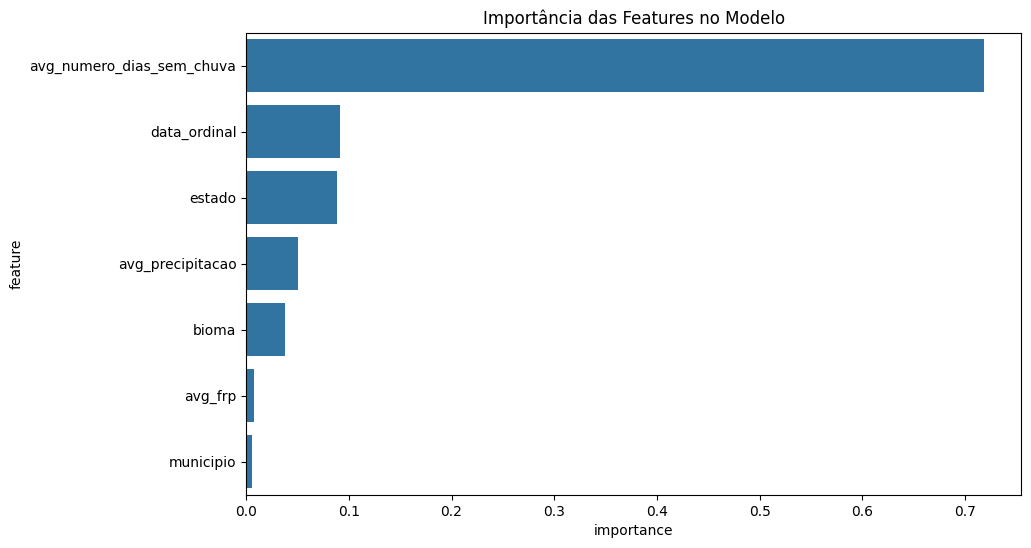

In [31]:
importances = fire_model.feature_importances_
feature_names = X_train.columns

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)


print(feature_importances)


plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Importância das Features no Modelo')
plt.show()